<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nitys\AppData\Local\Temp\ipykernel_17792\3851209252.py:9: SyntaxWarning: invalid escape sequence '\D'
  data_parsing = pd.read_excel('Data\Data_TSUM.xlsx', sheet_name='Data_Parsing')
C:\Users\nitys\AppData\Local\Temp\ipykernel_17792\3851209252.py:10: SyntaxWarning: invalid escape sequence '\D'
  data_company = pd.read_excel('Data\Data_TSUM.xlsx', sheet_name='Data_Company')


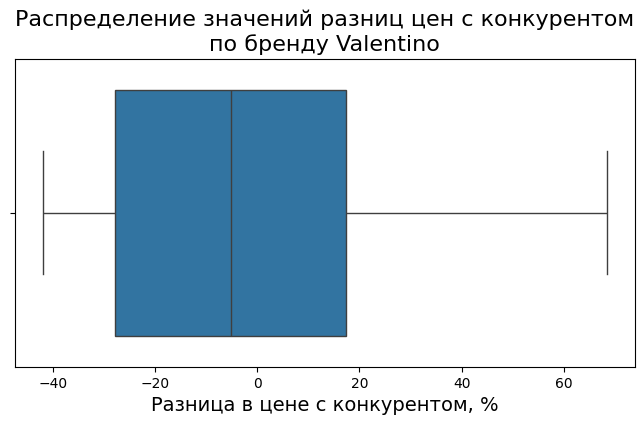

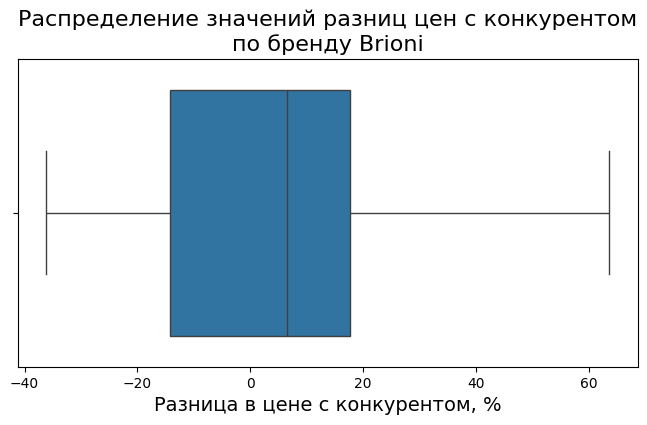

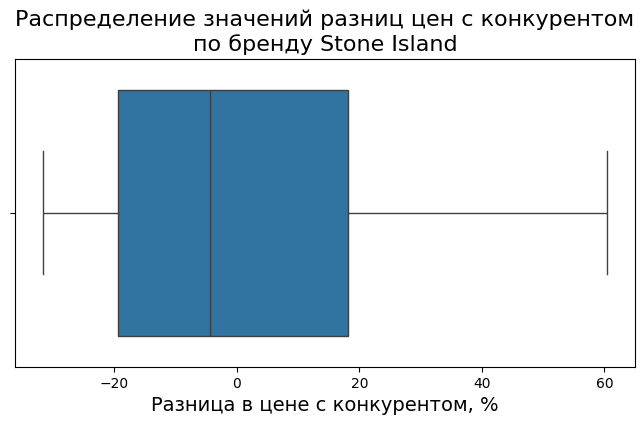

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data_parsing = pd.read_excel('Data\Data_TSUM.xlsx', sheet_name='Data_Parsing')
data_company = pd.read_excel('Data\Data_TSUM.xlsx', sheet_name='Data_Company')


def name_cleaner(name):
    new_w = ''
    for elem in name:
        symbols_list = [ '_', '-', '~', '\\', '/' ]
        for n in range(len(elem)):
            if elem[n] not in symbols_list:
                new_w += elem[n]
    return new_w

data_parsing['producer_id'] = data_parsing['producer_id'].apply(name_cleaner)
data_parsing['producer_color'] = data_parsing['producer_color'].apply(name_cleaner)


data_parsing = data_parsing.rename(columns={'producer_id': 'item_id'})
data_parsing = data_parsing.rename(columns={'price': 'parsing_price'})
data_company = data_company.rename(columns={'current price': 'company_price'})
data_company = data_company.drop(['brand', 'Category'], axis=1)


merged = data_parsing.merge(
    data_company,
    on='item_id',
    how='left'
    )


merged['diff_price'] = round(
    (merged['parsing_price'] - merged['company_price'])/merged['company_price']*100, 2)


for brand in merged['brand'].value_counts().index:
    fig, ax = plt.subplots(1,1, figsize = (8,4))
    boxplot = sns.boxplot(merged[
        merged['brand'] == brand]['diff_price'], ax=ax, orient='h')
    boxplot.set_title( ('Распределение значений разниц цен с конкурентом' + '\n' + 'по бренду ' + brand), fontsize=16)
    boxplot.set_xlabel('Разница в цене с конкурентом, %', fontsize=14)
    
# merged.to_excel('data\merged.xlsx')